# Search and Planning
* Author: Johannes Maucher
* Last Update: 26.10.2020

## Goal-based Agent
![agentGoal.png](https://maucher.home.hdm-stuttgart.de/Pics/agentGoal.png)

## Utility-based Agent
![agentGoal.png](https://maucher.home.hdm-stuttgart.de/Pics/agentUtility.png)

## Applications

**Navigation:** $\Rightarrow$ Uniform-Cost- / A*-Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/bingsuche.PNG" style="width:800px" align="center">

**General Planning Problems:**

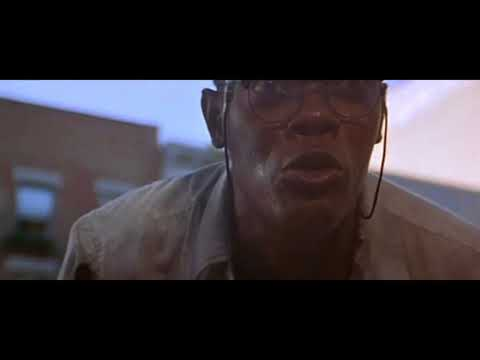

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('6J_Kaklz4f0', width=800, height=300)

**8-Puzzle:** $\Rightarrow$ Breadth-First-Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/8puzzleExample.png" style="width:800px" align="center">

**Boardgames (Chess)** $\Rightarrow$ MinMax-Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/ibmDeepBlue.PNG" style="width:400px" align="center">

**Go:** $\Rightarrow$ Monte-Carlo-Tree-Search
<img src="https://maucher.home.hdm-stuttgart.de/Pics/goGame.png" style="width:500px" align="center">

**Constraint Satisfaction Problem:**

<div>
    <img src="https://maucher.home.hdm-stuttgart.de/Pics/colormapTask.png" style="width:400px" align="left">
    <div style="padding-top: 80px">
        <p>Color regions with either red, green or blue,</p>
        <p>such that no pair of neighboring regions have same color</p>
    </div>
</div>

**Sudoku:** $\Rightarrow$ Constraint-Satisfaction Problem (Backtracking)
<img src="https://maucher.home.hdm-stuttgart.de/Pics/sudoku.gif" style="width:500px" align="center">

**General Logistics and Scheduling Problems:** $\Rightarrow$ Constraint Satisfaction Problem / Genetic Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/genAlgLogistikLager.PNG" style="width:600px" align="center">

**General Logistiks and Scheduling Problems:** $\Rightarrow$ Constraint Satisfaction Problem / Genetic Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/genAlgLogistikPackung.PNG" style="width:400px" align="center">

## Requirements
* The algorithms, discussed in this notebook require an environment, which is
    * Fully observable
    * Deterministic
    * Static

## Problem Specification
For each problem, which shall be solved by an approach of this notebook, the following must be specified:
* What is a **state**?
* What is the initial state? What is the goal-state?
* If initial- and/or goal- state is hard to define a **utility-function** may do the job
* What is an **action**? Which actions are available in which states?
* What are the **costs** of actions?
* For heuristic algorithms: How to estimate the **utility** of an arbitrary state

## Performance Metrics for Search- and Planning-Algorithms
* **Completeness:** Algorithm guarantees to find a solution.
* **Optimal:** Algorithm guarantees to find optimal solution.
* **Complexity:** In terms of time and memory
* **Global:** Solution is a path from intitial- to goal-state
* **Local:** Solution is a good state

## Algorithm Categories
* uninformed
* heuristic (informed)
* global 
* local 
* goal-based
* utility-based

## Global, Uninformed Search

Find solution by construction of search-tree from current-state to goal-state
* Breadth-First
* Depth-First
* Uniform Cost Search

**Example: 8-puzzle**

Initial State:

|       |       |       |
|  -    |   -   |   -   |
| 4 	| 1 	| 2 	|
| 7 	| e 	| 3 	|
| 8	    | 5 	| 6 	|

Goal State:


|       |       |       |
|  -    |   -   |   -   |
| 1 	| 2 	| 3 	|
| 4 	| 5 	| 6 	|
| 7 	| 8 	| e 	|

### Breadth-First
<img src="https://maucher.home.hdm-stuttgart.de/Pics/breadthfirst.png" style="width:900px" align="center">

1. Start from the initial node
2. Expand node by applying all available actions of this state and obtain the corresponding sucessor states.
3. Select next state to expand, which is <font color="red">the topmost not yet expanded node</font>.
4. `If` the selected node is the **goal-state**: 
    Terminate and return path from initial- to goal-state
    
   `Else`: Continue with step 2


### Depth-First

<img src="https://maucher.home.hdm-stuttgart.de/Pics/depthfirst.png"  width="500" align="center">

1. Start from the initial node
2. Expand node by applying all available actions of this state and obtain the corresponding sucessor states.
3. Select next state to expand, which is <font color="red">the deepest not yet expanded node</font>.
4. `If` the selected node is the **goal-state**: 
    Terminate and return path from initial- to goal-state
    
   `Else`: Continue with step 2


### Uniform Cost search
1. Start from the initial node
2. Expand node by applying all available actions of this state and obtain the corresponding sucessor states.
3. Select next state to expand, which is <font color="red">the not yet expanded node, with the lowest accumulated costs</font>.
4. `If` the selected node is the **goal-state**: 
    Terminate and return path from initial- to goal-state
    
   `Else`: Continue with step 2

## Heuristic Search
* A* algorithm
* Find solution by construction of search-tree from current-state to goal-state 
* *Which node shall be expanded next?* regards not only previous costs, but also **estimated Costs to Goal**.

### A*-Algorithm
<img src="https://maucher.home.hdm-stuttgart.de/Pics/8puzzleAstern.png" style="width:700px" align="center">

1. Start from the initial node
2. Expand node by applying all available actions of this state and obtain the corresponding sucessor states.
3. Select next state to expand, which is <font color="red">the not yet expanded node, with the lowest value of *costs + heuristic*</font>.
4. `If` the selected node is the **goal-state**: 
    Terminate and return path from initial- to goal-state
    
   `Else`: Continue with step 2

## 2-Player Games
The algorithm described in this section is applicable for all games with the following characteristics:
- 2 players
- fully observable
- deterministic
- Zero-Sum

**Examples:** Checkers, Chess, Go, Reversi, Backgammon, ...

### MinMax-Algorithm
**Evaluation of states in level $L$ (planning horizon)**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/tree-0.png" style="width:900px" align="center">

* Root node of the tree is the current state of the game. Player **Max** is in turn.
* **Max** has two possible actions, the corresponding successor states are the states for which the other player, **Min**, must find a good action.
* In each of the two states in **Min's** level 2 actions are available. Again all successor states can be generated for the next level, which belongs to **Max**
* ...

In this way a tree can be calculated down to a level $L$. This level $L$ constitutes the *planning horizon* and depends on the affordable complexity.

Once all nodes in level $L$ are generated a **utility function** is applied to all states in this level. 

If level $L-1$ belongs to **Min** he will choose in each state the action, which leads to a successor of minimum utility - since minimum utility for **Max** is maximum utility of **Min**. Therefore, to each node in level $L-1$, the minimum utility of it's successor nodes is assigned.

In the same way to each node in level $L-2$, the maximum utility of it's successor nodes in level $L-1$ is assigned.

This process is repeated up to the root node. Player **Max** then knows his next action: The one, which yields to a successor with maximum utility-value.

**Player Min selects actions to nodes with minimum utility for Player Max:**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/tree-1.png" style="width:900px" align="center">

**Player Max selects actions to nodes with maximum utility:**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/tree-2.png" style="width:900px" align="center">

**Player Min selects actions to nodes with minimum utility for Player Max:**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/tree-3.png" style="width:900px" align="center">

**Player Max selects actions to nodes with maximum utility:**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/tree-4.png" style="width:900px" align="center">

<img src="https://maucher.home.hdm-stuttgart.de/Pics/tttBewertet2.PNG" style="width:800px" align="center">

## Monte-Carlo Tree Search
* The concept of a <font color="red">limited planning horizon</font>, as applied in the Min/Max-algorithm is one way to handle complex problems, which can not be planned to the goal-state in one step.
* Another concept is to construct a tree until a final state in such a way that in each state only <font color="red"> promising actions </font> and corresponding successors are generated. This concept is applied by <font color="red"> Monte Carlo Tree Search </font>.

**Monte-Carlo Tree Search:**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/mcts.png" style="width:800px" align="center">

**Monte Carlo Tree Search:**

* **Selection:** Starting from the root node, apply *Tree Policy* in order to select next action. Tree Policy exploits node-statistics
* **Expansion:** In a leaf-node select an arbitrary action and generate the corresponding new child-node.
* **Simulation:** Simulate the game, starting from the new child-node. Action-Selection during simulation according to *Default Policy*, e.g.:
    - Randomly (Pure Monte Carlo)
    - Favor actions with higher estimated chance of success, if corresponding heuristics are available.
    
* At the end of each simulation: Game is won or lost.
* **Backpropagation:** Adapt node-statistics of all nodes in tree, starting from the leaf-node of previous simulation.

If the computational budget is reached MCTS returns with the best action a for the given root node.

**Characteristics of MCTS:**
* Applicable even for games with very large branching factor
* Basic Algorithm easy to implement
* Configurable stop-time (Longer time yields better game play)
* **Doesn’t require domain knowledge**

## AlphaGo and AlphaZero
* AlphaGo is MCTS, which applies (Deep) Neural Networks in order to calculate good heuristics for
- the next action to choose in the selection-phase
- which leaf-node to extend in the expansion phase
- which actions to choose in the simulation phase
* In AlphaGo the networks for the heuristics in the selection- and the simulation-phase are trained from expert-moves
* In AlphaZero no Domain-knowledge (database of expert moves) is required.

## Constraint Satisfaction Problems (CSP)

### Problem Specification
* Set of <font color="red">variables</font>:

$$
\mathcal{X}=\lbrace X_1, X_2, \ldots,X_n \rbrace
$$

* <font color="red">Domain $D_i$</font> of a variable $X_i$ is the set of possible values for $X_i$. 
* Set of <font color="red">constraints</font>:

$$
\mathcal{C}=\lbrace C_1, C_2,, \ldots,C_m \rbrace
$$

* Each constraint refers to a set of variables from $\mathcal{X}$

**Problem Specification** (continued):

* <font color="red">State</font> is a concrete assignment of values to a set of variables from $\mathcal{X}$
* An assignment of values, which does not violate any constraint is called <font color="red">consistent</font>.
* <font color="red">Complete Assignment:</font> If values are assigned to all variables
* <font color="red">Solution of CSP</font>: If a complete assignment is consistent.
* Sometimes solutions that <font color="red">maximize a utility function</font> are required.
\end{itemize}

### Backtracking Algorithm
* Backtracking is a variant of deep-first-search, which assigns in each level values to only one variable.
* Values are assigned to variables such that assignment is consistent
* Target test: Check if assignment is complete and consistent

## Local Search / Optimisation Algorithms

### Genetic Algorithm
* Realizes concept of Darwin's Theory of Evolution
    - **Population of individuals**
    - Individuals are **selected** (randomly). 
    - Selection probability depends on **fitness** of individuals 
    - Selected individuals generate new individuals by **crossover** (randomly)
    - There may be random **mutations** in new individuals
    - Each individual has a fitness
    - **Only the fittest survive**


<img src="https://maucher.home.hdm-stuttgart.de/Pics/AblaufGenAlgEng.png" style="width:200px" align="center">



<img src="https://maucher.home.hdm-stuttgart.de/Pics/GeneticAlg.png" style="width:800px" align="center">


### Problem Specification:
* What is an individual (a *state*)?
* Define random selection
* Define function for crossover
* Define function for mutation
* Define fitness-function

### Applications
* Genetic Algorithms are applied for a wide range of search- and optimisation problems.
* Examples:
    - Best solution in the Daimler container packing project
    - Wireless Network optimisation
    - Neural network optimisation
    - Logistik and Scheduling problems of all types
    - Find optimal parameters for complex control systems (motor-control)
    - Gaming AI
        - Evolution of artificial agents
        - Procedural Content Generation
    - [Traveling Salesman Problem](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
    - [Vehicle Configuration Demo](http://rednuht.org/genetic_cars_2/).